<a href="https://colab.research.google.com/github/negarhonarvar/SAT-optimized-solver/blob/main/SAT_Genetics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Libraries

In [ ]:
import random
import math
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
path = '/content/drive/MyDrive/Colab Notebooks/Input.cnf'

Mounted at /content/drive


# Reading the CNF File

In [ ]:
def read_cnf_file(file_path):
    formula = []
    with open(file_path, 'r') as f:
        lines = f.readlines()
        for line in lines:
            if line.startswith('c') or line.startswith('p') or line.strip() == '':
                continue
            temp_list = line.split()[:-1]
            clause = []
            for num in temp_list:
                literal = int(num)
                clause.append((abs(literal), 1 if literal > 0 else 0))
            formula.append(clause)
    return formula

# Genetics Algorithm Implementation

In [ ]:
def initialize_population(pop_size, var_count):
    population = []
    for _ in range(pop_size):
        individual = [random.randint(0, 1) for _ in range(var_count)]
        population.append(individual)
    return population

In [ ]:
def count_satisfied_clauses(individual, formula):
    satisfied_count = 0
    for clause in formula:
        if any(individual[lit[0] - 1] == lit[1] for lit in clause):
            satisfied_count += 1
    return satisfied_count

In [ ]:
def crossover(parents):
    cross_point = random.randint(60, 95)  # Arbitrary crossover range
    parent_one, parent_two = random.sample(parents, 2)

    child1 = parent_one[:cross_point] + parent_two[cross_point:]
    child2 = parent_two[:cross_point] + parent_one[cross_point:]

    return [child1, child2]


In [ ]:
def mutate(children, mutation_rate=0.01):
    for child in children:
        if random.random() < mutation_rate:
            mutate_point = random.randint(0, len(child) - 1)
            child[mutate_point] = 1 - child[mutate_point]  # Flip the bit
    return children

In [ ]:
def genetic_algorithm(formula, pop_size=8, generations=1000):
    var_count = 100
    population = initialize_population(pop_size, var_count)

    best_fitness = 0
    fitness_history = []

    for gen in range(generations):
        fitness_values = [count_satisfied_clauses(individual, formula) for individual in population]

        max_fitness = max(fitness_values)
        fitness_history.append(max_fitness)
        if max_fitness > best_fitness:
            best_fitness = max_fitness

        sorted_population = [x for _, x in sorted(zip(fitness_values, population), reverse=True)]
        parents = sorted_population[:4]
        children = []
        while len(children) < pop_size:
            children.extend(crossover(parents))

        population = mutate(children[:pop_size])

    plt.plot(range(generations), fitness_history)
    plt.xlabel('Generation')
    plt.ylabel('Best Fitness (Satisfied Clauses)')
    plt.title('Genetic Algorithm Optimization Progress')
    plt.show()

    return best_fitness

# Main

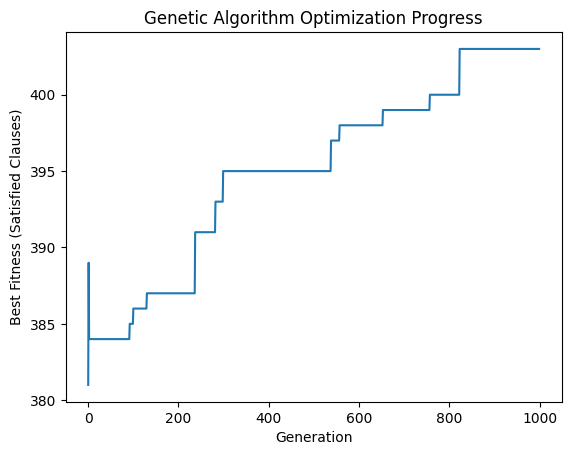

Best solution satisfies 403 clauses.


In [ ]:
formula = read_cnf_file(path)
best_solution_fitness = genetic_algorithm(formula, pop_size=8, generations=1000)
print(f"Best solution satisfies {best_solution_fitness} clauses.")